In [16]:
import pandas as pd
df = pd.read_csv("Desktop/predict.csv")


In [9]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05 00:00:00+00:00,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12 00:00:00+00:00,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19 00:00:00+00:00,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26 00:00:00+00:00,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05 00:00:00+00:00,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28 00:00:00+00:00,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05 00:00:00+00:00,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12 00:00:00+00:00,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19 00:00:00+00:00,718125.53,0,56.47,3.969,192.330854,8.667


In [17]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [18]:
df = df.dropna(subset=['CustomerID'])


In [19]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]


In [20]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]


In [21]:
# Create TotalAmount
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [22]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [23]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [24]:
df.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalAmount
count,397884.000000,397884,397884.000000,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453,22.397000
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,179.331775,NaN,22.097877,1713.141560,309.071041


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


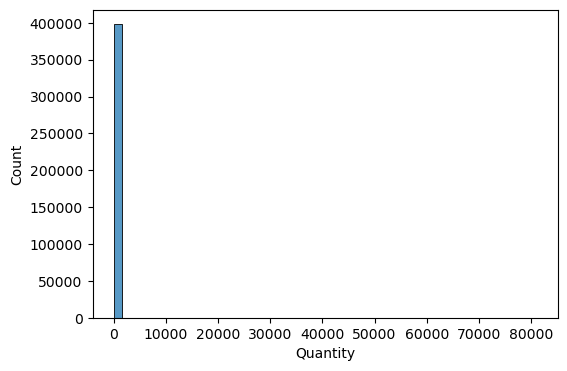

In [26]:
# Quantity Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Quantity'], bins=50)
plt.show()


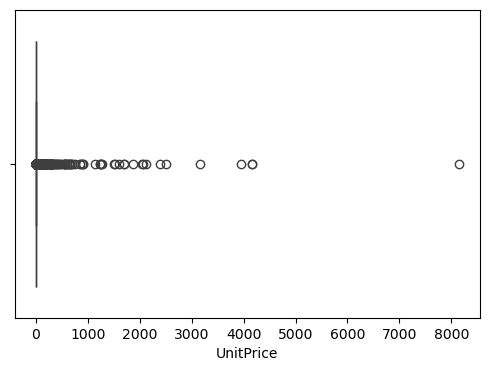

In [27]:
# Unit Price Distribution
plt.figure(figsize=(6,4))
sns.boxplot(x=df['UnitPrice'])
plt.show()


In [28]:
# Top 10 Customers by Revenue
top_customers = df.groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=False).head(10)
top_customers


CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: TotalAmount, dtype: float64

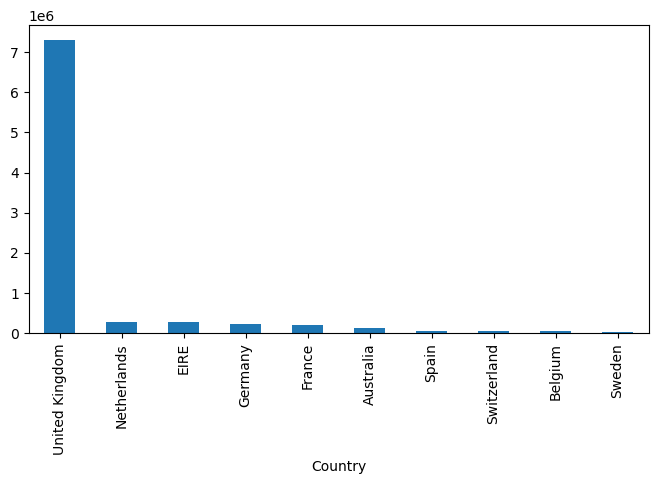

In [29]:
# Country-wise Sales
country_sales = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(10)
country_sales.plot(kind='bar', figsize=(8,4))
plt.show()


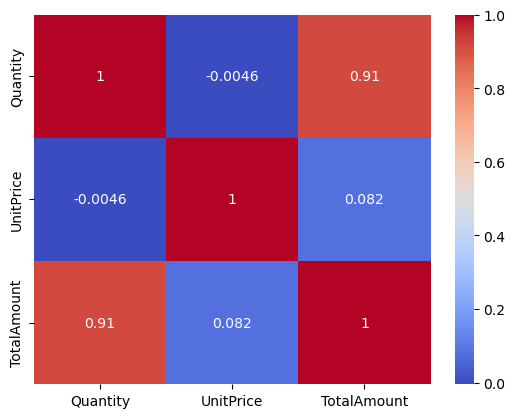

In [30]:
# Correlation Analysis
sns.heatmap(df[['Quantity','UnitPrice','TotalAmount']].corr(), annot=True, cmap='coolwarm')
plt.show()


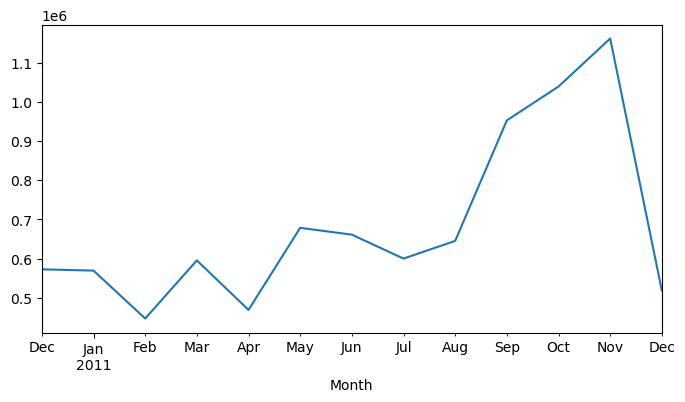

In [31]:
# Monthly Sales Trend
df['Month'] = df['InvoiceDate'].dt.to_period('M')

monthly_sales = df.groupby('Month')['TotalAmount'].sum()
monthly_sales.plot(figsize=(8,4))
plt.show()
